This notebook explains why do precision and recall have a trade-off. Before we begin, let us have an overview of the intuitive meaning of Precision and Recall.

**Precision** indicates how confidently does our model predicts the positives(i.e. the number of True Positives among the Total Positive predictions). The **recall** is an indication of how well does our model predict the actual positives (i.e. True Positives/Actual Positives).

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the sample dataset.
df= pd.read_csv("Sample Dataset.csv")
df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X_train= df.iloc[:,0:8]
y_train= df.iloc[:,8:9]

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)

classifier= LogisticRegression()
classifier= classifier.fit(X_train,y_train)

In [4]:
# The classifier predicts each of the class with certain value of probability. These probabilities can be obtained from the
# below function: predict_proba
predicted_probabilities= classifier.predict_proba(X_train)

In [5]:
# Considering the probabilities of only one of the class
prob_scores= predicted_probabilities[:,1]

In [6]:
prec, recall ,thresholds= precision_recall_curve(y_train, prob_scores)

1. When we increase the threshold, the model would become more confident in every prediction. Due to this, the precision of the model would increase. However, at times precision may also decrease due to model inconsistencies(i.e. model predicting wrong probabilities).

2. When we increase the threshold, the model would either predict the same number of records as positive, or it would predict fewer records as positive. Due to this, the recall would always decrease.

3. The below graph shows recall always remains the same or decreases with an increase in the threshold.

4. Precision shows some ups and downs towards the end.

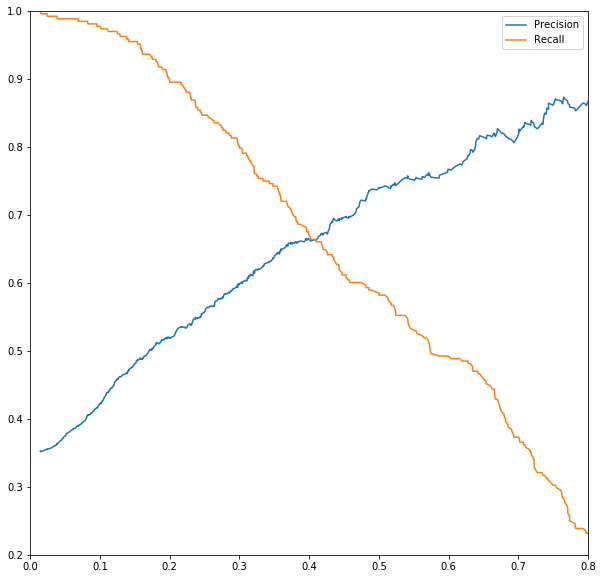

In [7]:
plt.figure(figsize=(10,10))
plt.plot(thresholds, prec[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlim(0,0.8)
plt.ylim(0.2,1)
plt.legend()